In [93]:
from HaloUtils import DarkMatter,Galaxies
from SizeUtils import K13Model
import numpy as np
from astropy.cosmology import FlatLambdaCDM
import astropy
import astropy.units as u
import matplotlib.pylab as plt
import pandas as pd
import matplotlib as mpl
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['axes.linewidth']=5
plt.rcParams['xtick.major.size'] =15
plt.rcParams['ytick.major.size'] =15
plt.rcParams['xtick.minor.size'] =10
plt.rcParams['ytick.minor.size'] =10
plt.rcParams['xtick.major.width'] =5
plt.rcParams['ytick.major.width'] =5
plt.rcParams['xtick.minor.width'] =5
plt.rcParams['ytick.minor.width'] =5
plt.rcParams['axes.titlepad'] = 10

plt.rcParams['font.size']=55
plt.rcParams['figure.figsize']=(12,16)

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import colorcet as cc
from mpl_toolkits.axes_grid1 import make_axes_locatable

def multiline(xs, ys, c, bubu=None, ax=None, **kwargs):
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax

    # create LineCollection
    segments = np.array([np.column_stack([x, y]) for x, y in zip(xs, ys)])
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale 
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    ax.autoscale()
    ax.set_title(bubu
                )
    return lc

In [95]:
from matplotlib.ticker import Locator

class MinorSymLogLocator(Locator):
    """
    Dynamically find minor tick positions based on the positions of
    major ticks for a symlog scaling.
    """
    def __init__(self, linthresh):
        """
        Ticks will be placed between the major ticks.
        The placement is linear for x between -linthresh and linthresh,
        otherwise its logarithmically
        """
        self.linthresh = linthresh

    def __call__(self):
        'Return the locations of the ticks'
        majorlocs = self.axis.get_majorticklocs()

        # iterate through minor locs
        minorlocs = []

        # handle the lowest part
        for i in range(1, len(majorlocs)):
            majorstep = majorlocs[i] - majorlocs[i-1]
            if abs(majorlocs[i-1] + majorstep/2) < self.linthresh:
                ndivs = 10
            else:
                ndivs = 9
            minorstep = majorstep / ndivs
            locs = np.arange(majorlocs[i-1], majorlocs[i], minorstep)[1:]
            minorlocs.extend(locs)

        return self.raise_if_exceeds(np.array(minorlocs))

    def tick_values(self, vmin, vmax):
        raise NotImplementedError('Cannot get tick locations for a '
                                  '%s type.' % type(self))


In [96]:
cosmo = FlatLambdaCDM(H0=70,Om0=0.3)

In [97]:
model_1 = dict(gamma10=0.5, scatterevol=False, gamma11=0,M11=0,SHMnorm11=0) 
model_2 = dict(gamma10=0.5, scatterevol=True, gamma11=0,M11=0,SHMnorm11=0) 
model_3 = dict(gamma10=0.65, scatterevol=False, gamma11=0,M11=0,SHMnorm11=0) 
model_4 = dict(gamma10=0.65, scatterevol=True, gamma11=0,M11=0,SHMnorm11=0) 

In [99]:
models = [model_1,model_2,model_3,model_4]
dictionary_models = {'model 1':model_1, 'model 2':model_2,'model 3':model_3,'model 4':model_4}

out = {model_label: {'star forming':[], 'quenched':[]} for model_label in dictionary_models.keys()}
out

[4.1982507288629736e-07, 3.935860058309038e-07, 4.4606413994169104e-07, 4.723032069970846e-07, 5.685131195335277e-07, 5.422740524781341e-07, 6.034985422740525e-07, 6.0932944606414e-07, 5.947521865889214e-07, 6.880466472303208e-07, 7.405247813411078e-07, 6.880466472303206e-07, 8.163265306122449e-07, 9.446064139941692e-07, 7.900874635568512e-07, 9.300291545189506e-07, 1.1166180758017491e-06, 1.0728862973760933e-06, 1.2040816326530612e-06, 1.1924198250728862e-06, 1.2419825072886295e-06, 1.227405247813411e-06, 1.3411078717201165e-06, 1.3848396501457726e-06, 1.5189504373177842e-06, 1.7084548104956267e-06, 1.641399416909621e-06, 1.938775510204082e-06, 1.9154518950437317e-06, 2.151603498542274e-06, 2.0524781341107876e-06, 2.1107871720116618e-06, 2.2798833819241982e-06, 2.358600583090379e-06, 2.411078717201166e-06, 2.4344023323615157e-06, 2.5801749271137024e-06, 2.883381924198251e-06, 2.8833819241982513e-06, 2.9008746355685125e-06, 2.965014577259475e-06, 2.9154518950437314e-06, 3.1865889212827

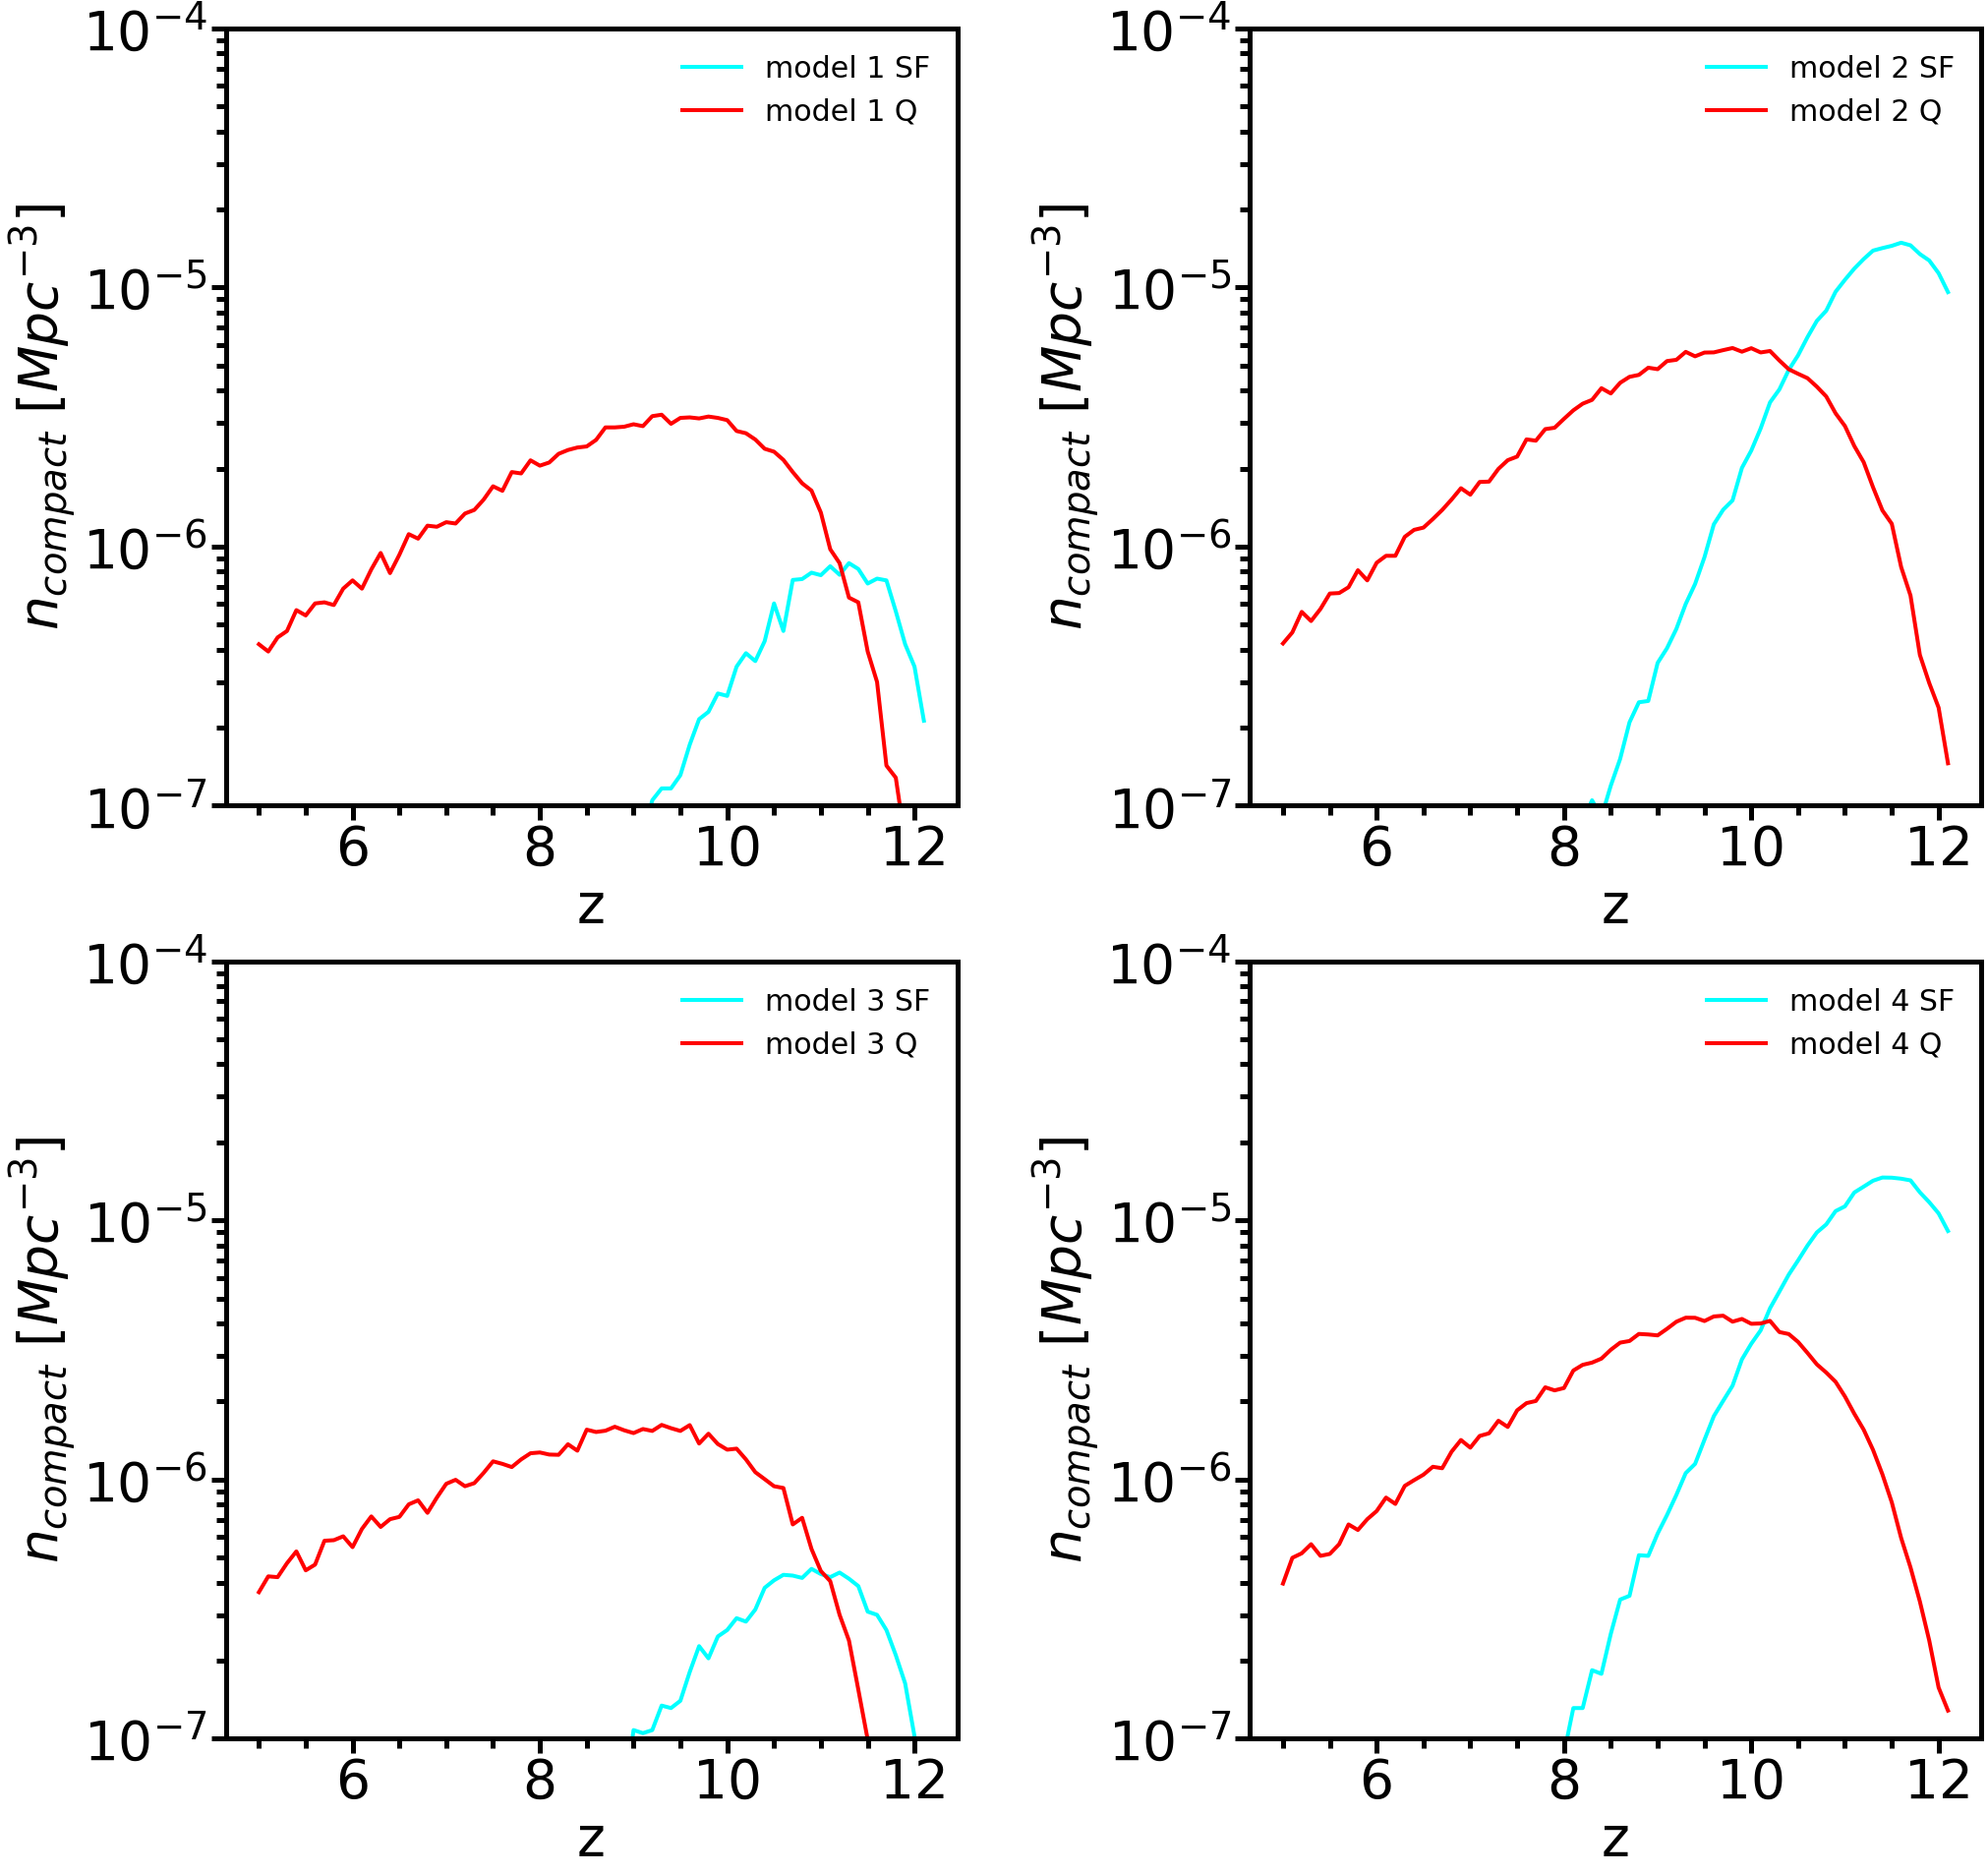

In [163]:
bins=np.arange(-2,2,0.10)
fig, axes = plt.subplots(2,2, sharey=False, figsize=(32,32))

mus = [3]

x = np.arange(1000,1000)
#axes[0][0].text(0.2,3.e-4, r'$\delta=0.5$'+ '\n'+r'$\sigma_{SMHM}$=const', fontsize=40)
#axes[1][0].text(0.2,3.e-4, r'$\delta=0.5$'+ '\n'+r'$\sigma_{SMHM}$=evol', fontsize=40)
#axes[0][1].plot(x,x, lw=4, ls='-', color='cyan', label='star forming')
#axes[0][1].plot(x,x, lw=4, ls='-', color='red', label='quiescent')


#linestyles = ['-','--',':','-.']
#axes[1][1].plot(x,x, lw=4, ls='-', color='black', label='$\mu=${}'.format(mus[0]))
#axes[1][1].plot(x,x, lw=4, ls='--',  color='black', label='$\mu=${}'.format(mus[1]))
#axes[1][1].plot(x,x, lw=4, ls=':',  color='black', label='$\mu=${}'.format(mus[2]))
            
#redshifts = np.linspace(0.1,4.6,46)
#times = cosmo.lookback_time(redshifts)

times = np.arange(5,12.2,0.1)
to_z = lambda x: astropy.cosmology.z_at_value(cosmo.lookback_time, x*u.Gyr)
redshifts = np.array(list(map(to_z, times)))

out = {model_label: {'star forming':[], 'quenched':[]} for model_label in dictionary_models.keys()}

for ax,(model_label, model) in zip(axes.ravel(),dictionary_models.items()):
    for j,mu in enumerate(mus):
        quench_dict = {'M0':1,'mu':mu}
        Ncompact_SF = []
        Ncompact_Q = []
        for i,z in enumerate(redshifts):
            galaxies = Galaxies(z=z,dict_SMHM=model, quench_dict=quench_dict)
            df = galaxies.catalog
            df = df.query('11.3<Mstar<12.1')

            Q = df.query("TType=='ETGs'")
            SF = df.query("TType=='LTGs'")

            QsizeModel = K13Model(rhalo=Q['Rh'], A_K=0.018, sigma_K=0.1 )
            SFsizeModel = K13Model(rhalo=SF['Rh'], A_K=0.022*1.45, sigma_K=0.1 )
            ReSF = SFsizeModel.to_galaxy_size()
            ReQ = QsizeModel.to_galaxy_size()
            
            if i==0:
                Re0 = np.median(ReQ)

            _, Ncompact_SF_ = SFsizeModel.get_number_density_and_compacts(ReSF, bins=bins,Type='Cassata', stars=None, Re0=Re0)
            _, Ncompact_Q_ = QsizeModel.get_number_density_and_compacts(ReQ, bins=bins,Type='Cassata', stars=None, Re0=Re0)
            Ncompact_SF.append(Ncompact_SF_)
            Ncompact_Q.append(Ncompact_Q_)
        print(Ncompact_Q)
        out[model_label]['star forming'] = Ncompact_SF
        out[model_label]['quenched'] = Ncompact_Q
        ax.plot(times, Ncompact_SF, lw=4, color='cyan',label=model_label+' SF')
        ax.plot(times, Ncompact_Q, lw=4, color='red', label=model_label+' Q')
        ax.set_ylim(1e-7,1.e-4)
       #ax.set_xlim(0,4)
       # ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_ylabel('$n_{compact} \ [Mpc^{-3}]$')
       # ax[1].text(1.5,1.e-4,'prediction', fontsize=45)
       # ax[0].text(1.5,1.e-4,'calibration', fontsize=45)


        ax.legend(fontsize=30, frameon=False, loc='upper right')
#axes[1][0].legend(fontsize=30, frameon=False)
        ax.set_xlabel('z')
        ax.set_xlabel('z')
plt.subplots_adjust(wspace=0.4)    


In [101]:
redshifts

array([0.49430972, 0.50838598, 0.52271537, 0.53730606, 0.55216663,
       0.56730604, 0.58273364, 0.59845928, 0.61449324, 0.63084634,
       0.64752988, 0.6645558 , 0.68193657, 0.69968536, 0.71781598,
       0.73634301, 0.75528178, 0.77464849, 0.79446019, 0.81473493,
       0.83549174, 0.8567508 , 0.87853343, 0.90086223, 0.92376121,
       0.94725577, 0.97137302, 0.99614168, 1.02159244, 1.04775787,
       1.07467288, 1.10237467, 1.13090304, 1.16030066, 1.19061325,
       1.22188992, 1.25418343, 1.28755068, 1.32205297, 1.35775652,
       1.394733  , 1.43306008, 1.47282211, 1.51411078, 1.5570261 ,
       1.60167728, 1.6481838 , 1.69667685, 1.7473006 , 1.80021404,
       1.85559287, 1.91363191, 1.97454767, 2.03858173, 2.10600432,
       2.177119  , 2.2522679 , 2.33183826, 2.41627036, 2.5060668 ,
       2.60180469, 2.70414972, 2.81387474, 2.93188236, 3.05923413,
       3.19718788, 3.34724657, 3.51122226, 3.69132188, 3.8902636 ,
       4.11143792, 4.3591345 ])

In [166]:
def smooth(x):
    return pd.Series(x).rolling(window=4).mean()

dt = 0.1
maxDt = 1
N = int(maxDt/dt)
deltas = np.arange(0.1,N*dt,dt)
offsets = {model_lab : np.zeros((N,len(times))) for model_lab in dictionary_models.keys()}
n_SF_model = {model_lab : np.zeros((N,len(times))) for model_lab in dictionary_models.keys()}
for model_lab in offsets.keys():
    for i in range(1,N+1):
        app = []
        app1 = []
        for t in range(len(times)-1,-1,-1):
            
            nQ_t_dt = out[model_lab]['quenched'][t-i]
            nQ_t = out[model_lab]['quenched'][t]
            nSF_t = out[model_lab]['star forming'][t]
            app.append(+nQ_t_dt - nQ_t-nSF_t)
            app1.append(nQ_t_dt - nQ_t)
        #offsets[model_lab][i] = np.flip(app)
        n_SF_model[model_lab][i-1] = np.flip(app1)

In [167]:
out['model 2']['star forming']-n_SF_model['model 2'][5]

array([-4.11078717e-07, -1.80758017e-07,  1.80758017e-07,  2.18658892e-07,
        3.38192420e-07,  5.18950437e-07,  2.39067055e-07,  2.33236152e-07,
        2.53644315e-07,  2.27405248e-07,  2.94460641e-07,  2.62390671e-07,
        2.68221574e-07,  3.96501458e-07,  3.52769679e-07,  4.46064140e-07,
        4.13994169e-07,  4.66472303e-07,  6.00583090e-07,  5.88921283e-07,
        4.34402332e-07,  6.03498542e-07,  5.04373178e-07,  6.18075802e-07,
        6.47230321e-07,  5.56851312e-07,  1.02332362e-06,  8.22157434e-07,
        1.08454810e-06,  9.18367347e-07,  1.01457726e-06,  1.17201166e-06,
        1.05539359e-06,  1.22448980e-06,  1.33527697e-06,  1.14285714e-06,
        1.32653061e-06,  1.37317784e-06,  1.28862974e-06,  1.47230321e-06,
        1.10787172e-06,  1.70553936e-06,  1.45189504e-06,  1.72303207e-06,
        1.54227405e-06,  1.61516035e-06,  1.99708455e-06,  1.91836735e-06,
        2.08746356e-06,  2.02040816e-06,  2.75218659e-06,  2.86297376e-06,
        3.67055394e-06,  

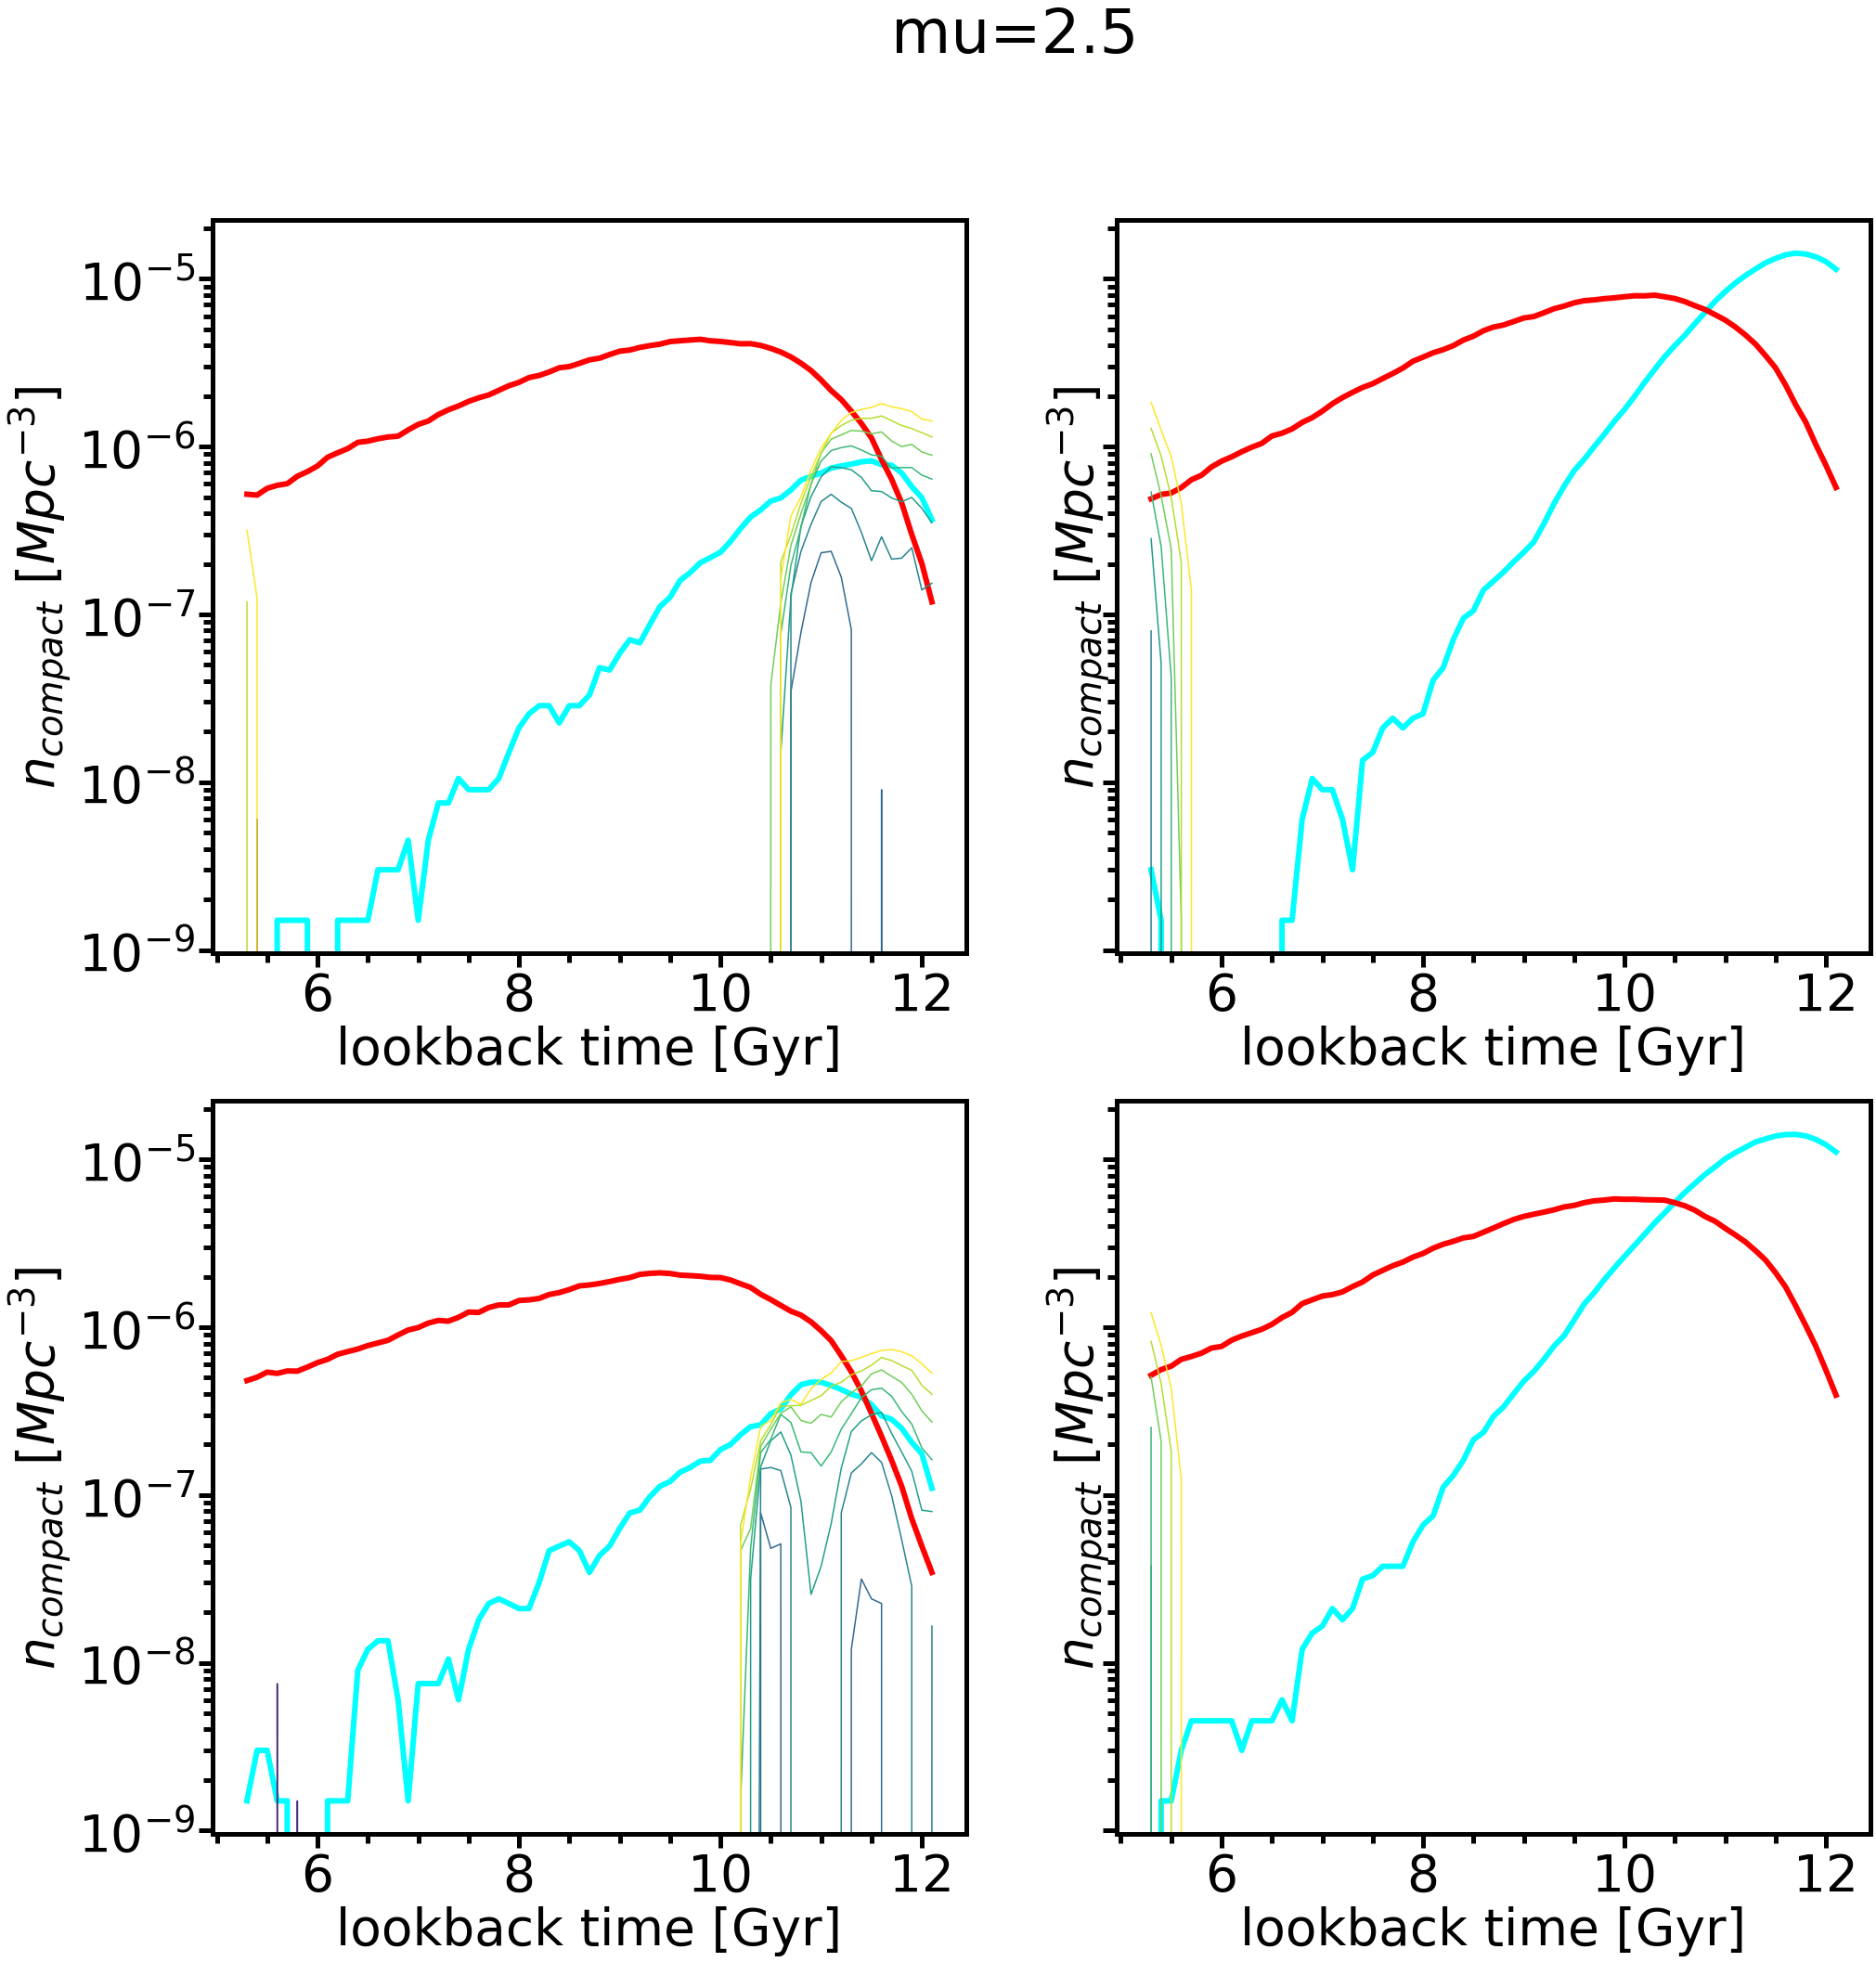

In [103]:
import cycler

color = plt.cm.viridis(np.linspace(0, 1,N))
plt.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

fig,axes = plt.subplots(2,2, figsize=(32,32), sharey=True)
for ax, mod_label in zip(axes.ravel(),out.keys()):

    ax.plot(times,smooth(out[mod_label]['star forming']), color='cyan', lw=6, )
    ax.plot(times,smooth(out[mod_label]['quenched']), color='red', lw=6, )
    

    for i in range(N):
        off = smooth(offsets[mod_label][i])
       # off = offsets[mod_label][i]
        im = ax.plot(times,off)
    #fig.colorbar(im,ax=ax)
#plt.legend(frameon=False)
    ax.set_yscale('log')
    ax.set_ylabel('$n_{compact} \ [Mpc^{-3}]$')
    ax.set_xlabel('lookback time [Gyr]')
    #ax.set_yscale('symlog',linthreshy=1.e-6)
fig.suptitle(f'mu={mu}')

fig.savefig(f'continuity_mu_{mu}.pdf', bbox_inches='tight')

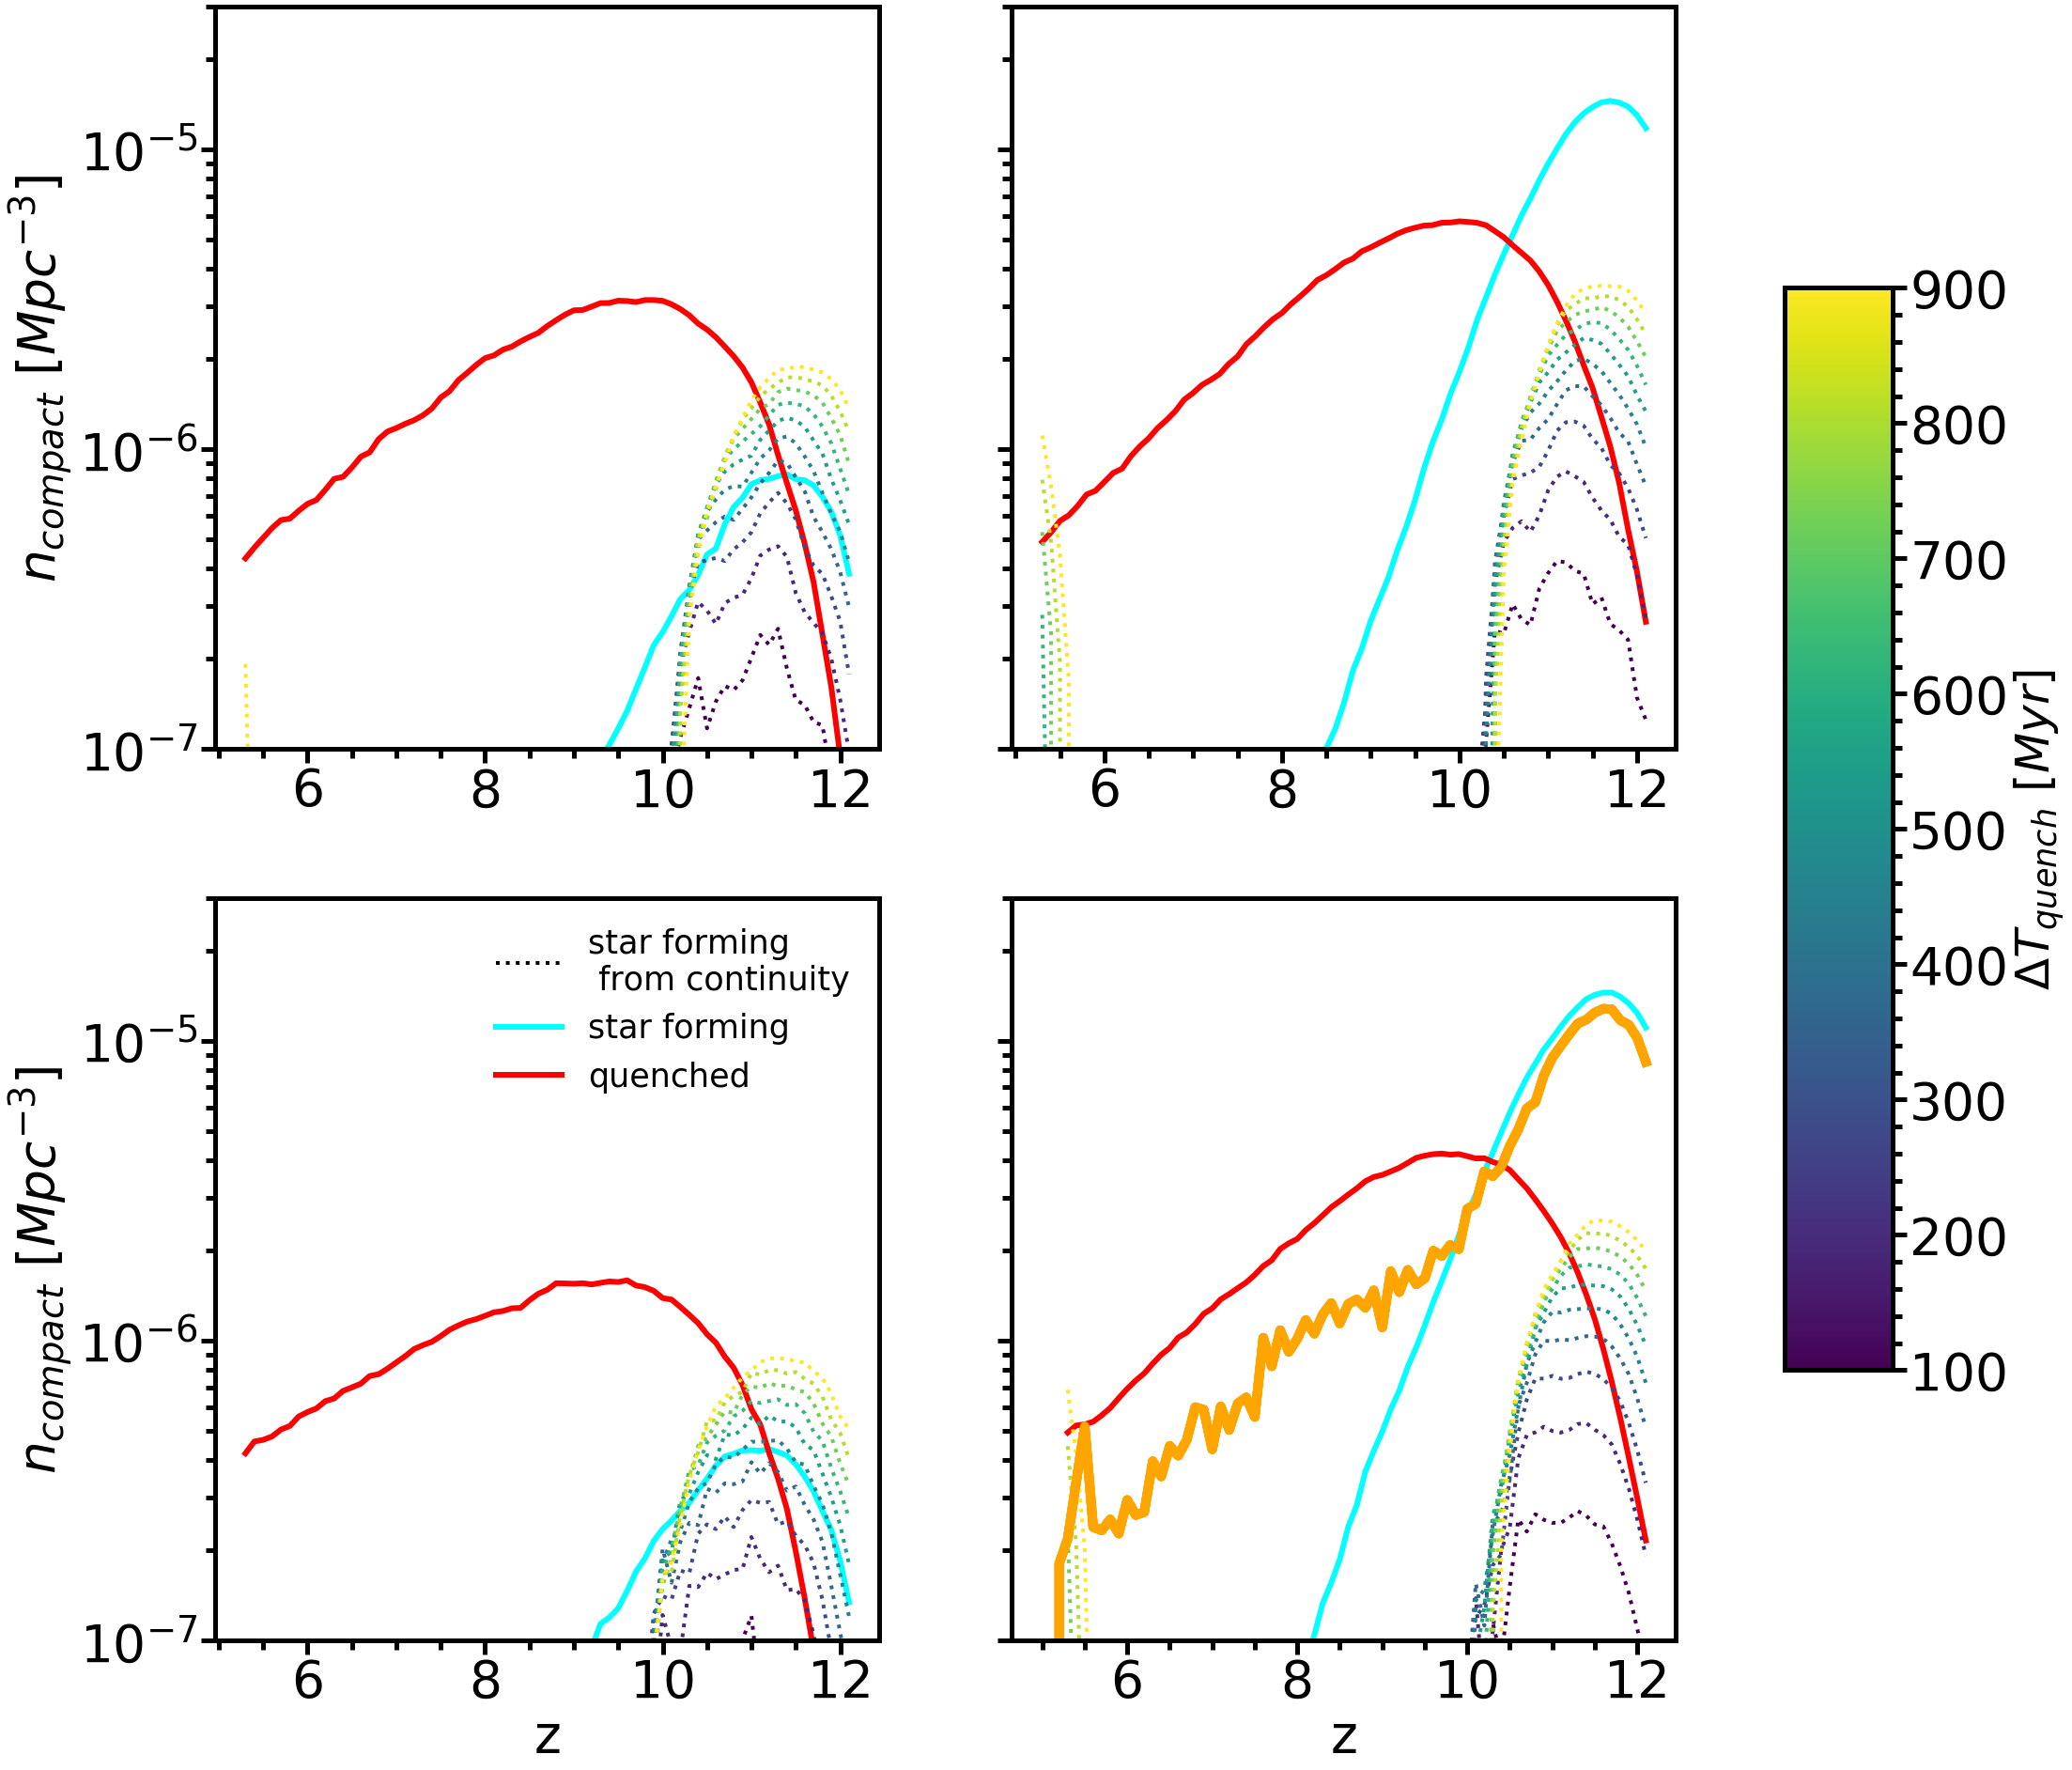

In [169]:
import cycler

color = plt.cm.viridis(np.linspace(0, 1,N))
plt.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

fig,axes = plt.subplots(2,2, figsize=(32,32), sharey=True)

xx = np.arange(1000,1000)
axes[1][0].plot(xx,xx, color='black',ls=':', lw=4, label='star forming\n from continuity')
for ax, mod_label in zip(axes.ravel(),out.keys()):

    ax.plot(times,smooth(out[mod_label]['star forming']), color='cyan', lw=6, label='star forming')
    ax.plot(times,smooth(out[mod_label]['quenched']), color='red', lw=6, label='quenched')
    
    ax.set_title(mod_label)
    off = []
    T = []
    for i in range(0,N):
        off = np.append(off,smooth(n_SF_model[mod_label][i]))
       # off = offsets[mod_label][i]
        ax.plot(times,smooth(n_SF_model[mod_label][i]), ls=':', lw=4)
        T = np.append(T,times)
    lc = multiline(T,np.asarray(off), c=deltas[::-1]*1000,cmap=mpl.cm.viridis, ax=ax, lw=4)
    #fig.colorbar(im,ax=ax)
#plt.legend(frameon=False)
    ax.set_yscale('log')
    plt.plot(times, out['model 2']['star forming']-n_SF_model['model 2'][5], color='orange', lw=10)
    #ax.set_yscale('symlog',linthreshy=1.e-6)
    ax.set_ylim(1.e-7, 3.e-5)
axes[0][0].set_ylabel('$n_{compact} \ [Mpc^{-3}]$')
axes[1][0].set_ylabel('$n_{compact} \ [Mpc^{-3}]$')
axes[1][0].set_xlabel('z')    
axes[1][1].set_xlabel('z')    

plt.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7], aspect=10)
cbar = fig.colorbar(lc, cax=cbar_ax, orientation='vertical')
cbar.set_label('$\Delta T_{quench} \ [Myr]$', fontsize=50)

#fig.suptitle(f'mu={mu}')
axes[1][0].legend(frameon=False,fontsize=35)
#fig.savefig(f'continuity_mu_{mu}_nSF.pdf', bbox_inches='tight')

In [158]:
from numba import jit

In [148]:
color = plt.cm.viridis(np.linspace(0, 1,10))
color

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.229739, 0.322361, 0.545706, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.369214, 0.788888, 0.382914, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

In [44]:


z = [2.078,2.196,2.732,3.333,3.960]
up = [2.086,2.545,1.619,1.132,0.6216]
low = [1.528,1.637,0.89.0.6,0.3]
mean = [1.5,2.1,1.4,0.7,0.46]
names = ['S20','B17','L20','E20','K18']


5
4
3
2
1


In [43]:
range?

Init signature: range(self, /, *args, **kwargs)
Docstring:     
range(stop) -> range object
range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
These are exactly the valid indices for a list of 4 elements.
When step is given, it specifies the increment (or decrement).
Type:           type
Subclasses:     
